# TP images
## SSII - 2020-21
### Diane Lingrand (Diane.Lingrand@univ-cotedazur.fr)

In [19]:
from skimage import io
from skimage import data
from skimage import color
import numpy as np
from matplotlib import pyplot as plt

# Une première image

## Image issue de la bibliothèque scikit-image

In [2]:
img = data.chelsea()

De quel type de donnée s'agit-il ?

In [3]:
print(type(img))

<class 'numpy.ndarray'>


Quelles dimensions (largeur, hauteur, nombre de canaux)?

In [4]:
print(img.shape)

(300, 451, 3)


De quel type sont les valeurs ?

In [5]:
print(type(img[0][0][0]))

<class 'numpy.uint8'>


Peut-on la regarder ?

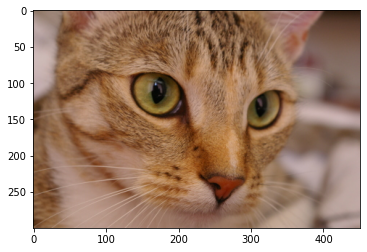

In [6]:
plt.imshow(img)

On peut aussi enlever les axes qui sont présents par défaut:

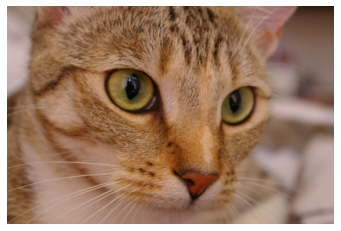

In [7]:
plt.axis('off')
plt.imshow(img)

Et si on change d'image ?

In [8]:
img = data.camera()

Quelles sont les dimensions ? Qu'est-ce qui a changé ? Comment la voyez-vous ?

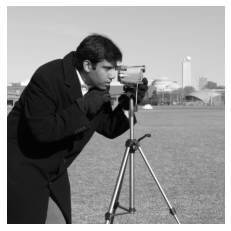

In [9]:
# pour vous
plt.axis('off')
plt.imshow(img,cmap=plt.cm.gray)

Par défaut, la visualisation des images en niveaux de gris se fait selon une <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html">table de couleur</a> qui n'est pas grise. Si vous souhaitez voir l'image en niveaux de gris, il faut le spécifier (cmap=plt.cm.gray).

## Image issue de votre disque dur

Testez différentes images au format JPG ou PNG. Regardez les dimensions et affichez les images.

In [26]:
img1 = io.imread('/home/paragoumba/Pictures/rdm-img/bon-toutou.jpg')
img2 = io.imread('/home/paragoumba/Pictures/rdm-img/VH-Random-duckhourse.jpg')

In [27]:
print(img1.shape)
print(img2.shape)

(457, 686, 3)
(444, 620, 3)


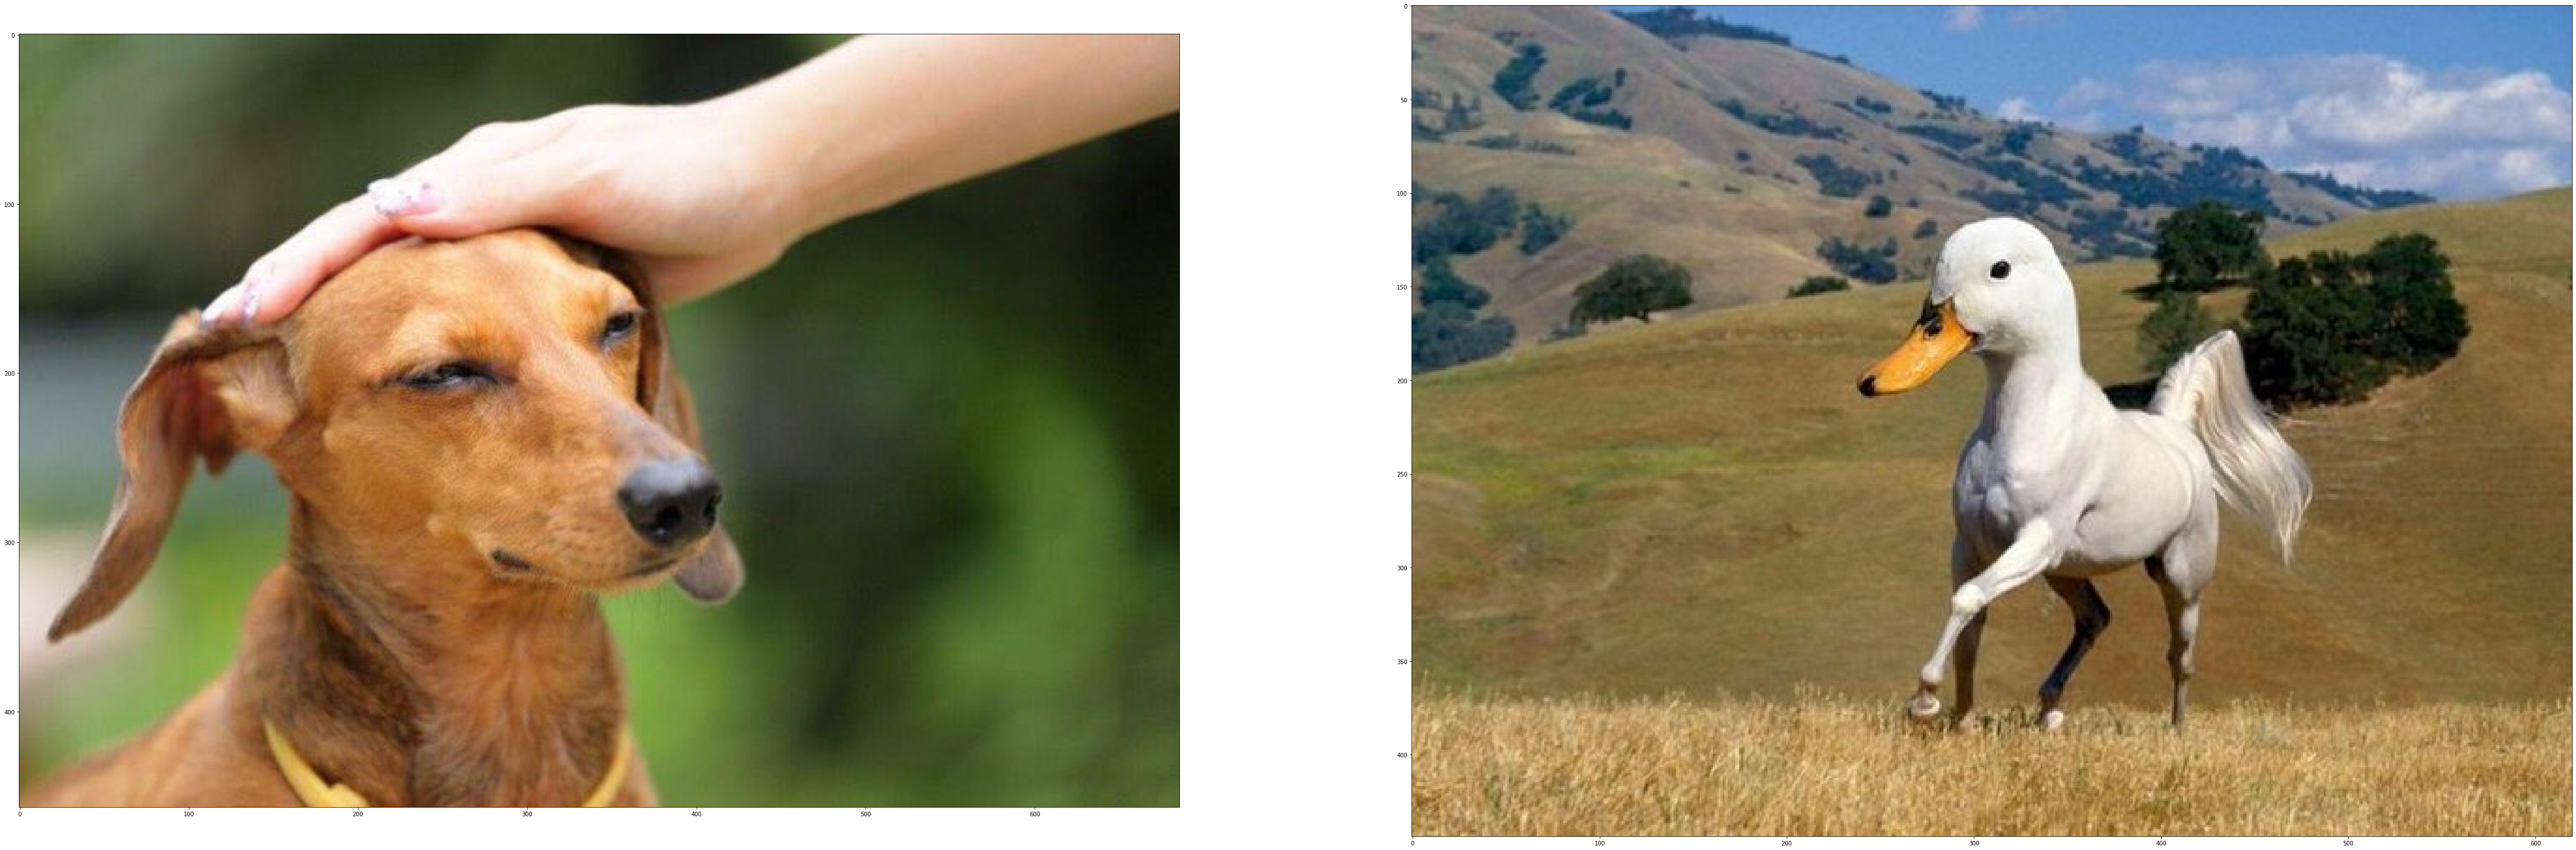

In [28]:
#une figure avec 2 images
fig = plt.figure(figsize=(80,40))
ax = fig.add_subplot(1, 2, 1)
plt.imshow(img1)
ax = fig.add_subplot(1, 2, 2)
plt.imshow(img2)
plt.show()

# Les canaux couleurs

## Visualisation des composantes R, G et B

Reprenons une image couleur à 3 canaux. On peut visualiser la composante rouge soit en niveaux de gris, soit en couleur:

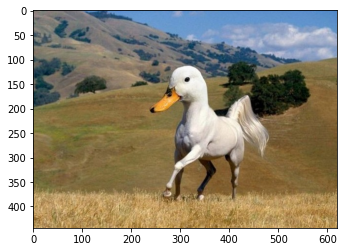

In [29]:
img=img2.copy() 
plt.imshow(img)

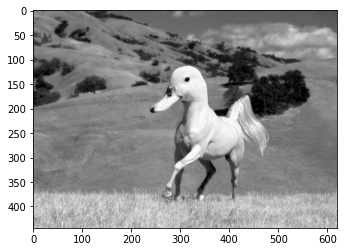

In [30]:
# une première solution
sh = img.shape
w = sh[0]
h = sh[1]
for i in range(0,w):
    for j in range(0,h):
        img[i][j][1] = img[i][j][0] # ou 0
        img[i][j][2] = img[i][j][0] # ou 0
plt.imshow(img)

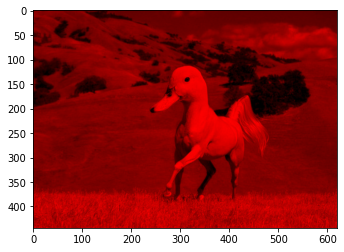

In [31]:
# une autre solution, plus compacte et ... plus efficace!
rMask = [1,0,0]

plt.imshow(rMask*img)


Comment voir cette composante rouge en niveaux de gris ?

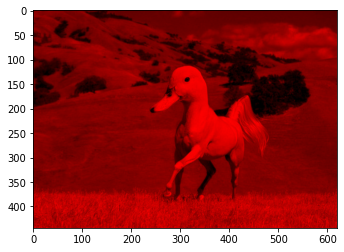

In [42]:
# pour vous
rMask = [1,0,0]

plt.imshow(rMask*img,cmap=plt.cm.gray)

Procédez de même pour les composantes vertes et bleues.

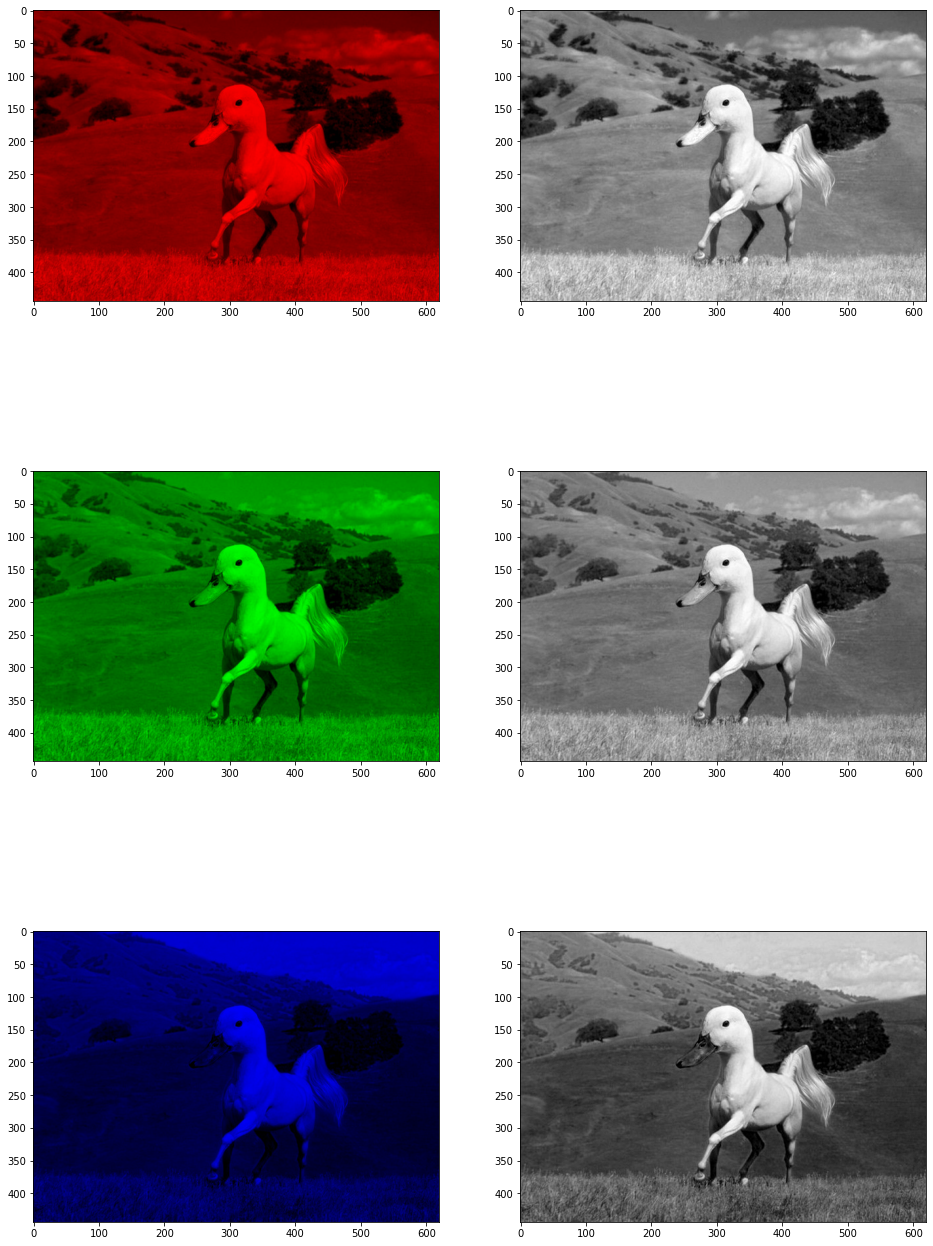

In [53]:
# pour vous
fig = plt.figure(figsize=(16,24))

mask = [1,0,0]

img = img2.copy()
ax = fig.add_subplot(3, 2, 1)
plt.imshow(mask*img)

img = img2.copy()
ax = fig.add_subplot(3, 2, 2)
plt.imshow((mask*img)[:,:,0],cmap=plt.cm.gray)

mask = [0,1,0]

img = img2.copy()
ax = fig.add_subplot(3, 2, 3)
plt.imshow(mask*img)

img = img2.copy()
ax = fig.add_subplot(3, 2, 4)
plt.imshow((mask*img)[:,:,1],cmap=plt.cm.gray)

mask = [0,0,1]

img = img2.copy()
ax = fig.add_subplot(3, 2, 5)
plt.imshow(mask*img)

img = img2.copy()
ax = fig.add_subplot(3, 2, 6)
plt.imshow((mask*img)[:,:,2],cmap=plt.cm.gray)

plt.show()

A partir d'une image d'une composante en niveaux de gris, seriez-vous capable de trouver de quelle composante il s'agit?

Quelle composante semble la plus proche de l'image des intensités ?

## Visualisation des composantes HSV

Pour cela, n'oubliez pas de consulter la <a href="https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2hsv">documentation</a>.

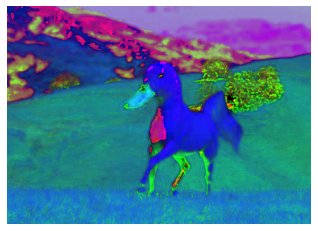

In [54]:
# à vous de jouer
img_hsv = color.rgb2hsv(img)
plt.axis('off')
plt.imshow(img_hsv)

## Visualisation des composantes YUV

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


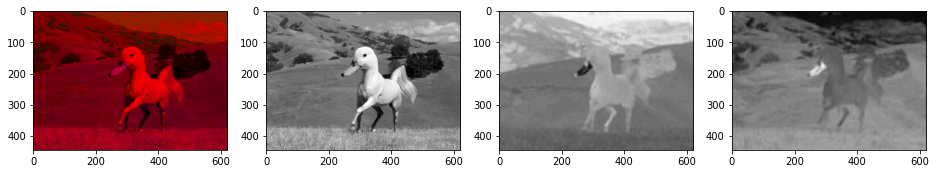

In [67]:
# à vous de jouer
mask = [1,0,0]
img_yuv=color.rgb2yuv(img2.copy())
img=img_yuv.copy()

fig = plt.figure(figsize=(16,24))

img=img_yuv.copy()

ax = fig.add_subplot(1, 4, 1)
plt.imshow(img)

ax = fig.add_subplot(1, 4, 2)
plt.imshow(img[:,:,0],cmap=plt.cm.gray)

mask = [0,1,0]

img=img_yuv.copy()

ax = fig.add_subplot(1, 4, 3)
plt.imshow(img[:,:,1],cmap=plt.cm.gray)

mask = [0,0,1]

img=img_yuv.copy()

ax = fig.add_subplot(1, 4, 4)
plt.imshow(img[:,:,2],cmap=plt.cm.gray)

plt.show()

Quelle composante comporte le plus de détails ?

Visualiser U et V à Y constant: on convertira tout d'abord l'image RGB en YUV, puis, en fixant Y constant sur toute l'image (par exemple une valeur moyenne), on recalculera RBG en fonction de ce Y et des composantes U et V initiales.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


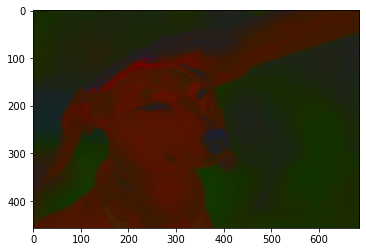

In [74]:
# à vous de jouer
img_yuv=color.rgb2yuv(img1.copy())

sum=0
i=0

for col in img_yuv:
    for p in col:
        for y in p:
            sum+=y
            i+=1
            
for x in range(0,len(img_yuv)):
    for y in range(0,len(img_yuv[x])):
        img_yuv[x][y][0]=sum/i

img=color.yuv2rgb(img_yuv)
plt.imshow(img)

# Des transformations simples

### video inverse

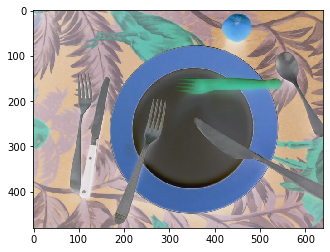

In [64]:
#à vous de jouer


### extraire, par exemple, les parties jaunes d'une image

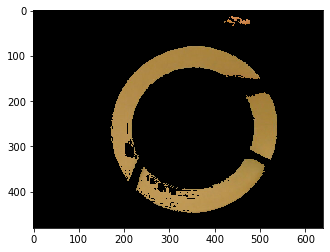

In [117]:
#à vous de jouer


On peut faire des seuillages directement sur l'image:

In [80]:
binary = img[:,:,0] > 100


In [81]:
print(binary.shape)


(480, 640)


In [82]:
print(type(binary[0][0]))

<class 'numpy.bool_'>


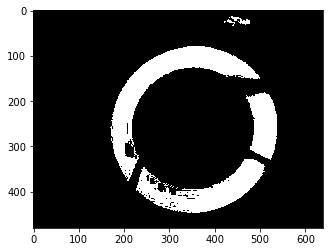

In [83]:
plt.imshow(binary, cmap=plt.cm.gray)

### histogramme d'une image

In [94]:
img = img2.copy() # on repart de l'image d'origine

In [113]:
histR, bin_edges = np.histogram(img[:,:,0], bins=255)
histG, bin_edges = np.histogram(img[:,:,1], bins=255)
histB, bin_edges = np.histogram(img[:,:,2], bins=255)

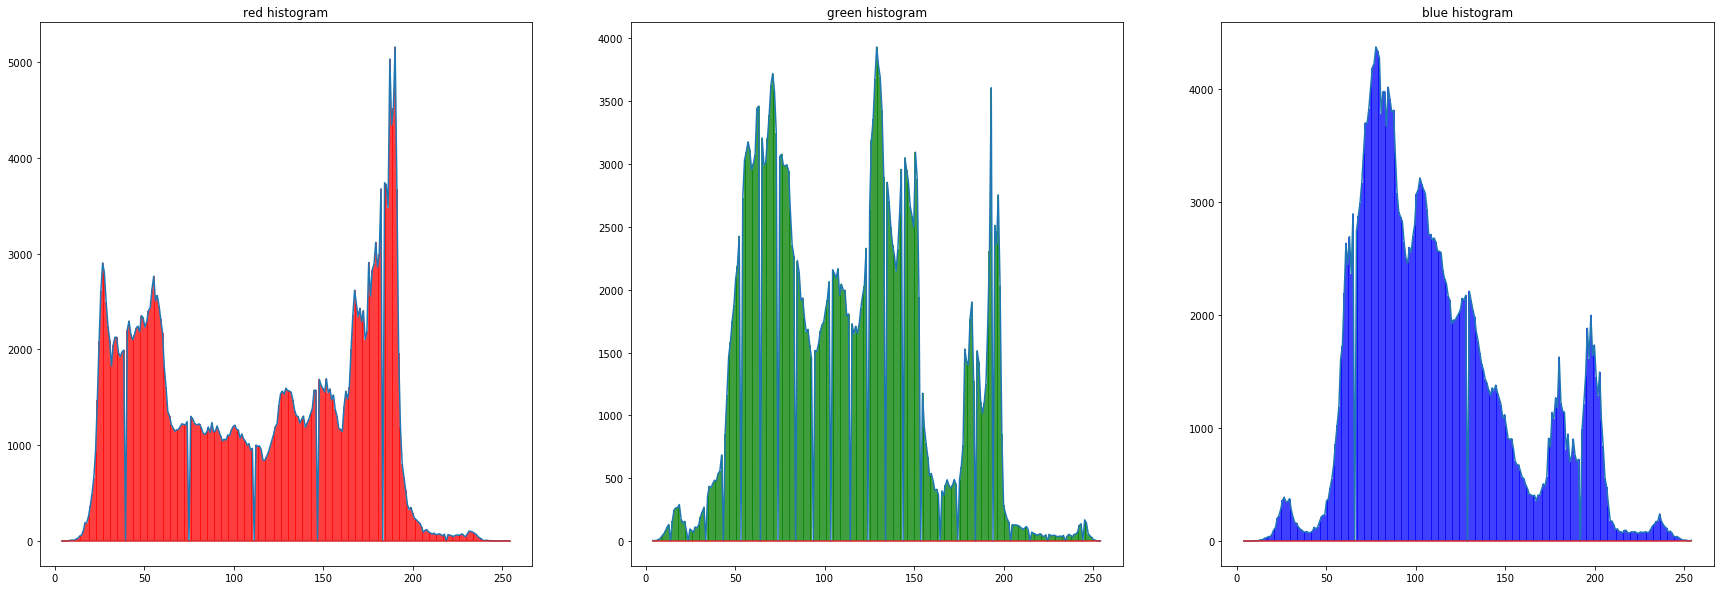

In [130]:
# en supposant qu'il s'agit d'une image RGB
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1,3,1)
ax.title.set_text('red histogram')
plt.stem(bin_edges[:-1], histR, linefmt='red', use_line_collection=True, markerfmt='')
ax = fig.add_subplot(1,3,2)
ax.title.set_text('green histogram')
plt.stem(bin_edges[:-1], histG, linefmt='green', use_line_collection=True, markerfmt='')
ax = fig.add_subplot(1,3,3)
ax.title.set_text('blue histogram')
plt.stem(bin_edges[:-1], histB, linefmt='blue', use_line_collection=True, markerfmt='')
plt.show()